<a href="https://colab.research.google.com/github/phenixua/HW9/blob/main/lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завантаження датасету:

# New Section

In [5]:
import numpy as np

from tensorflow import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



17464789/17464789 [==============================] - 0s 0us/step


In [6]:
print(train_data[0])
[1, 14, 22, 16, ..., 178, 32]


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


[1, 14, 22, 16, Ellipsis, 178, 32]

Для того, щоб подивитися безпосередньо на текст рецензії, можна виконати наступний код:

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
print(decoded_review)


1641221/1641221 [==============================] - 0s 0us/step
? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be ab

In [8]:
print(train_data.shape)
print(type(train_data[0]))
print(len(train_data[0]))


(25000,)
<class 'list'>
218


Виробимо one-hot кодування наших даних, виконавши наступний код:

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')


Тестові дані тепер являють собою 25000-елементний масив 10000-елементних векторів.

In [45]:
print(x_train.shape)


(25000, 10000)


Тепер визначимо архітектуру. Нехай нейромережа складається з 3 шарів:



Вхідний шар, що складається з 16 нейронів, який перетворює 10000-елементний вектор на 16-елементний вектор. В якості активаційної функції будемо використовувати ReLU.
Прихований шар, що складається з 16 нейронів, який перетворює 16-елементний вектор на 1-елементний вектор. В якості активаційної функції також використовуватимемо ReLU.
Вихідний шар, що складається з одного нейрона із сигмоїдальною активаційною функцією.

In [10]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])


Є альтернативний спосіб створення мережі:

In [11]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Нейронна мережа майже готова, залишилося ще кілька штрихів. Перш ніж приступити до навчання, потрібно вказати ще декілька параметрів: функцію помилки, критерій якості та оптимізатор, за допомогою якого буде виконуватися підгонка терезів нейромережі. Усі ці параметри ми можемо взяти з модулів optimizers, losses та metrics, а потім передати в метод model.compile:

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [13]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Тепер все готово, щоб розпочати навчання нейронної мережі. Для того, щоб виконати пошук оптимальних параметрів мережі потрібно лише викликати метод fit на екземплярі нашої моделі:

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)


Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5318 - accuracy: 0.7805 - val_loss: 0.4099 - val_accuracy: 0.8552
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3353 - accuracy: 0.8885 - val_loss: 0.3340 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2495 - accuracy: 0.9147 - val_loss: 0.2859 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2044 - accuracy: 0.9315 - val_loss: 0.2789 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1731 - accuracy: 0.9416 - val_loss: 0.2778 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1476 - accuracy: 0.9533 - val_loss: 0.2811 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1268 - accuracy: 0.9596 - val_loss: 0.2993 - val_accuracy: 0.8806
Epoch 8/20
30

In [15]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Візуалізуємо дані списки:

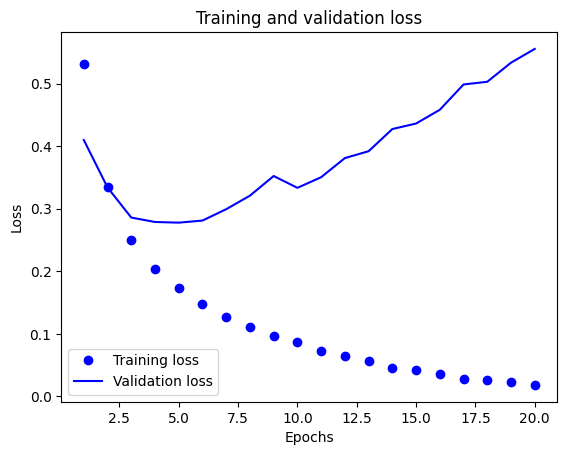

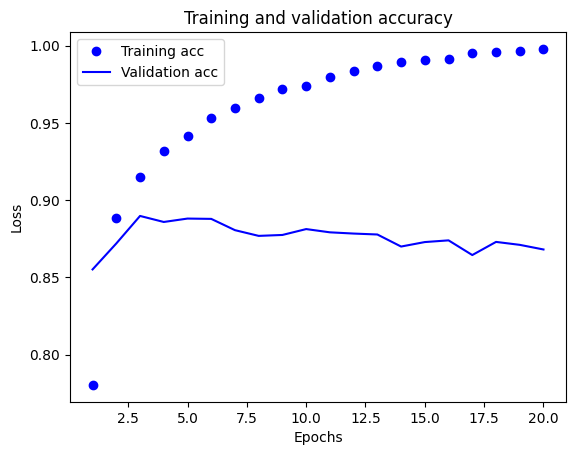

In [16]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [17]:
results = model.evaluate(x_test, y_test)
print
(results)


782/782 [==============================] - 2s 3ms/step - loss: 0.6029 - accuracy: 0.8552


[0.6028957366943359, 0.8551999926567078]

Нейронна мережа майже готова, залишилося ще кілька штрихів. Перш ніж приступити до навчання, потрібно вказати ще декілька параметрів: функцію помилки, критерій якості та оптимізатор, за допомогою якого буде виконуватися підгонка терезів нейромережі. Усі ці параметри ми можемо взяти з модулів optimizers, losses та metrics, а потім передати в метод model.compile:

In [18]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Повторне обчислення значення точності та помилки мережі.



In [19]:
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.5054 - accuracy: 0.8117
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.3070 - accuracy: 0.8972
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2385 - accuracy: 0.9147
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2781 - accuracy: 0.8897
[0.27812352776527405, 0.889680027961731]


In [20]:
results = model.evaluate(x_test, y_test)
print(results)


782/782 [==============================] - 2s 2ms/step - loss: 0.2781 - accuracy: 0.8897
[0.27812352776527405, 0.889680027961731]


In [21]:
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)


1/1 [==============================] - 0s 84ms/step
[[0.22862822]]


Збереження моделі у заданій локалізації:



In [22]:
model.save("my_model")


Завантаження моделі із заданої локалізації:

In [38]:
model = keras.models.load_model("my_model")
